In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
path = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_'
status = ['confirmed_global','deaths_global','recovered_global']
dfs = []
for s in status :
  d = pd.read_csv(f'{path}{s}.csv')
  dfs.append(d)
dfs

In [0]:
df = pd.concat(dfs,keys=status)
df

In [0]:
dtmps = []
for k in status:
  dtmps.append(pd.melt(df.loc[k],
                       id_vars=['Province/State','Country/Region','Lat','Long'],
                       var_name='Date', value_name=k))
dtmps

In [0]:
dcovid=pd.concat(dtmps, axis=1)
dcovid

In [0]:
dcovid.columns.duplicated()

In [0]:
dcovid=dcovid.loc[:,~dcovid.columns.duplicated()]
dcovid

In [0]:
dcovid.info()

In [0]:
dcovid['Date']=pd.to_datetime(dcovid['Date'])
dcovid.info()

In [0]:
dcovid=dcovid.sort_values(['Country/Region','Province/State','Date']).reset_index(drop=True)
dcovid

In [0]:
dcountry=dcovid.groupby(['Country/Region','Date']).sum()[['confirmed_global','deaths_global','recovered_global']]
dcountry

In [0]:
dcountry.reset_index(inplace=True)
dcountry

In [0]:
dcountry['daily_new_patient']=dcountry.groupby(['Country/Region'])['confirmed_global'].diff()
dcountry['daily_new_patient_pct']=dcountry.groupby(['Country/Region'])['confirmed_global'].pct_change()
dcountry

In [0]:
@interact(country=pd.Series(dcountry['Country/Region'].unique()).sort_values())
def plot_chart(country):
  df=dcountry[dcountry['Country/Region'].str.contains(country)]
  df[['Date','confirmed_global','deaths_global','recovered_global']].set_index('Date').plot(figsize=(10,4),
                                                                                            color=['blue','red','green'])

interactive(children=(Dropdown(description='country', options=('Afghanistan', 'Albania', 'Algeria', 'Andorra',…

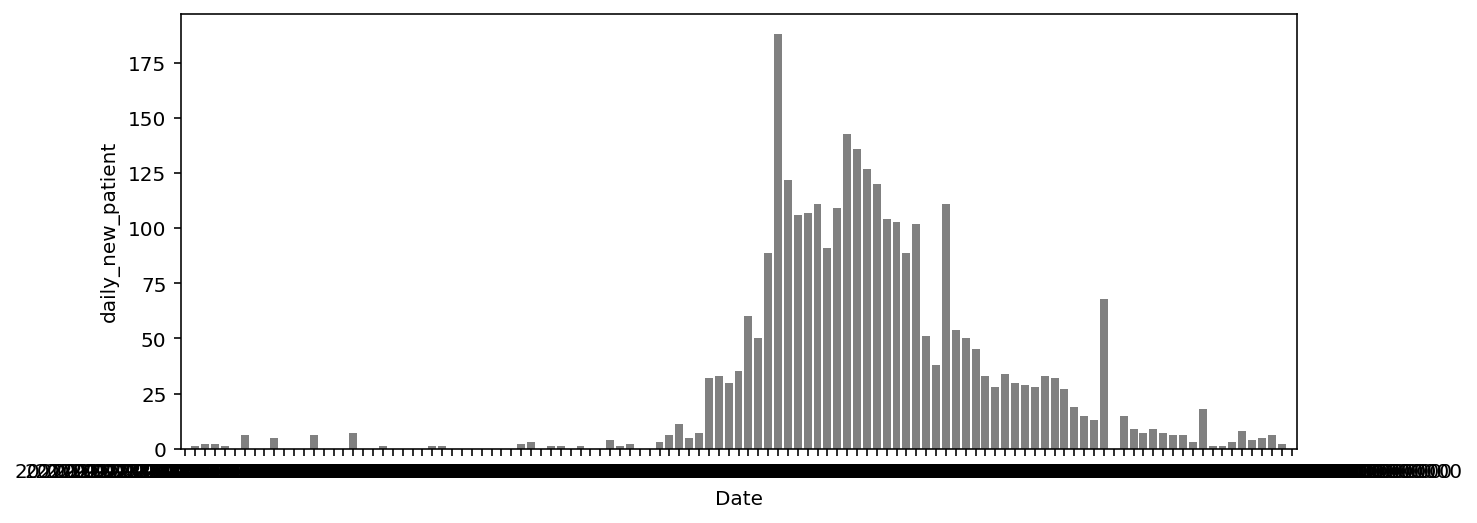

In [0]:
plt.figure(figsize=(10,4))
sns.barplot(data=dcountry[dcountry['Country/Region']=='Thailand'],
            x='Date',y='daily_new_patient',color='gray')